<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-&amp;-Load-data" data-toc-modified-id="Import-&amp;-Load-data-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import &amp; Load data</a></span></li></ul></li><li><span><a href="#Target-variable---revenue" data-toc-modified-id="Target-variable---revenue-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Target variable - revenue</a></span></li><li><span><a href="#Temporal-variables" data-toc-modified-id="Temporal-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Temporal variables</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Create-new-variables" data-toc-modified-id="Create-new-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create new variables</a></span></li><li><span><a href="#Variable-Types" data-toc-modified-id="Variable-Types-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Variable Types</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Relationship-between-missing-data-and-Revenue-(target)" data-toc-modified-id="Relationship-between-missing-data-and-Revenue-(target)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Relationship between missing data and Revenue (target)</a></span></li></ul></li><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Numerical variables</a></span><ul class="toc-item"><li><span><a href="#Simple-EDA" data-toc-modified-id="Simple-EDA-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simple EDA</a></span></li><li><span><a href="#Continous-variables-Transformation" data-toc-modified-id="Continous-variables-Transformation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Continous variables Transformation</a></span></li></ul></li><li><span><a href="#Binary-variables" data-toc-modified-id="Binary-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Binary variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Correlations-between-numerical-variables-and-target" data-toc-modified-id="Correlations-between-numerical-variables-and-target-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Correlations between numerical variables and target</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# TMDB_EDA_FeatureEngineering

### Introduction

In the previous notebook (TMDB_Cleaning_FeatureEngineering.ipynb), I cleaned dataset and extracted useful information from original variables and created new features. 

In this notebook, I will explore the cleaned dataset, and create some visualizations to see ditributions, the correlations between variables. If necessary, I will perform feature engineering. 

### Import & Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB'

In [2]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB/datasets')

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
data = pd.read_csv(path/'cleaned_train.csv')
print(data.shape)
data.head()

(3000, 19)


,id,budget,popularity,runtime,revenue,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew,release_month,release_day,release_year,release_dayofweek
0,1,14000000.0,6.575393,93.0,12314651,1,1,0,1,3,1,1,<5,24,medium,2,20,2015,4
1,2,40000000.0,8.248895,113.0,95149435,1,4,0,1,1,1,1,<5,20,small,8,6,2004,4
2,3,3300000.0,64.299990,105.0,13092000,0,1,1,1,3,1,1,<15,51,medium,10,10,2014,4
3,4,1200000.0,3.174936,122.0,16000000,0,2,1,0,NaN,1,2,<10,7,small,3,9,2012,4
4,5,NaN,1.148070,118.0,3923970,0,2,0,0,NaN,1,1,<5,4,small,2,5,2009,3


In [5]:
data_test = pd.read_csv(path/'cleaned_test.csv')

## Target variable - revenue

Let's start exploring the target distribution

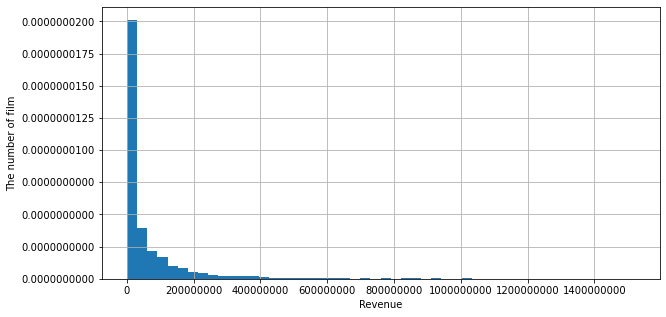

In [6]:
ax = data['revenue'].hist(bins=50, density=True, figsize=(10,5))
ax.set_ylabel('The number of film')
ax.set_xlabel('Revenue')
ax.ticklabel_format(style='plain')
plt.show()

We can see the target is continuous variable, and the distribution is skewed towards the right. 

We can improve the value spread with a log transformation

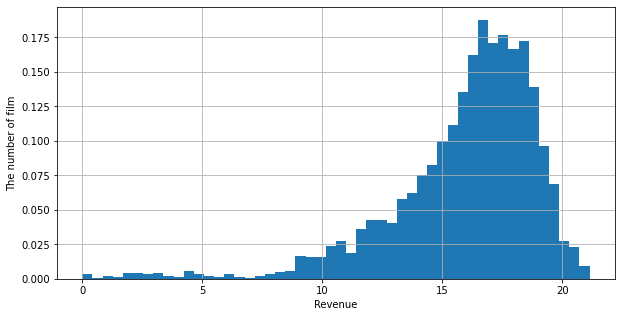

In [7]:
ax = np.log(data['revenue']).hist(bins=50, density=True, figsize=(10,5))
ax.set_ylabel('The number of film')
ax.set_xlabel('Revenue')
ax.ticklabel_format(style='plain')
plt.show()

Even though it is still skewed towards the left, this distribution looks more Gaussian

## Temporal variables


We have year, month, and dayofweek variables in the dataset

In [8]:
# create a list of temporal variables
temp_vars = ['release_year', 'release_month', 'release_day', 'release_dayofweek']

In [9]:
data[temp_vars].head()

,release_year,release_month,release_day,release_dayofweek
0,2015,2,20,4
1,2004,8,6,4
2,2014,10,10,4
3,2012,3,9,4
4,2009,2,5,3


Let's create some graphs and see the patterns

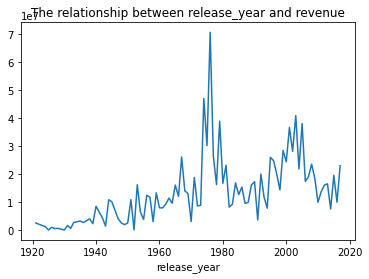

In [10]:
data.groupby('release_year')['revenue'].median().plot();
plt.title('The relationship between release_year and revenue');

It shows two peaks: between 1970 to 1980 and between 1990 and 2010. 

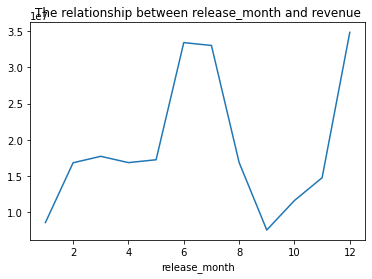

In [11]:
data.groupby('release_month')['revenue'].median().plot()
plt.title('The relationship between release_month and revenue');

Interestingly, it shows seasonality, which indicates that during summer and winter holiday seasons, the revenue of movies were high. 

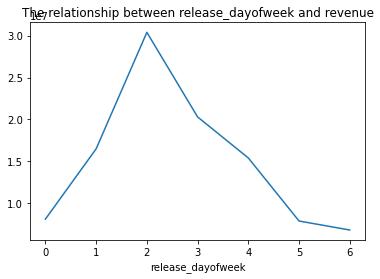

In [12]:
data.groupby('release_dayofweek')['revenue'].median().plot()
plt.title('The relationship between release_dayofweek and revenue');

Interestingly, the release on wednesday (2) and thursday (3) show high revenue compared to other days. 

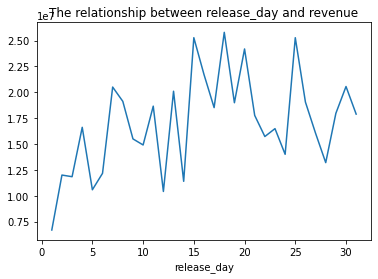

In [13]:
data.groupby('release_day')['revenue'].median().plot();
plt.title('The relationship between release_day and revenue');

It shows that days in 3 week or 4 week have high revenue compared to the beginning of the month. 

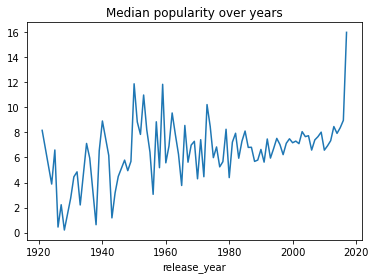

In [14]:
data.groupby('release_year')['popularity'].median().plot()
plt.title('Median popularity over years');

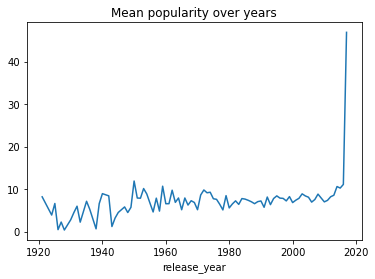

In [15]:
data.groupby('release_year')['popularity'].mean().plot()
plt.title('Mean popularity over years');

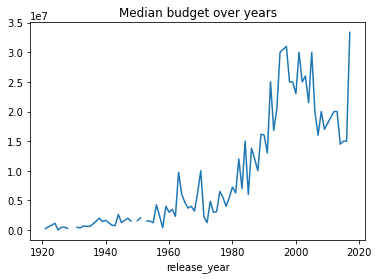

In [16]:
data.groupby('release_year')['budget'].median().plot()
plt.title('Median budget over years');

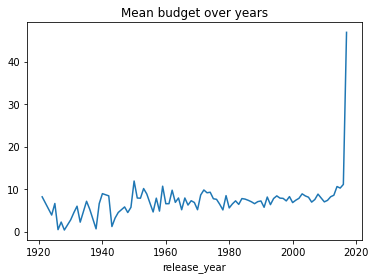

In [17]:
data.groupby('release_year')['popularity'].mean().plot()
plt.title('Mean budget over years');

As we can see the four graphs above, as `release_year` increases, the median and the mean of both `popularity` and `budget` tend to increase. 

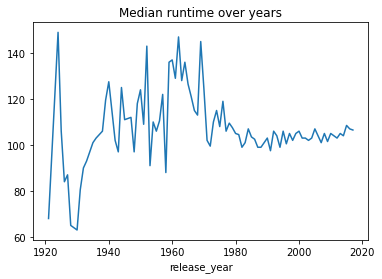

In [18]:
data.groupby('release_year')['runtime'].median().plot()
plt.title('Median runtime over years');

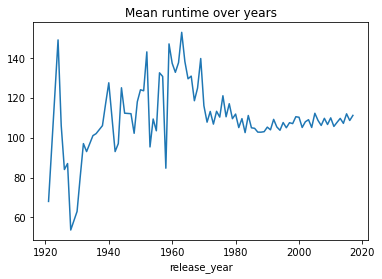

In [19]:
data.groupby('release_year')['runtime'].mean().plot()
plt.title('Mean runtime over years');

## EDA

### Create new variables

Based on the fact we found in 1.2 temporal variables, we can create new variables: `budget_year_ratio`, `runtime_to_mean_year`, `popularity_to_mean_year`, and `budget_to_mean_year`

In [20]:
data['budget_year_ratio'] = data['budget'] / (data['release_year']*data['release_year'])
data['runtime_to_mean_year'] = data['runtime'] / (data.groupby('release_year')['runtime'].transform('mean'))
data['popularity_to_mean_year'] = data['popularity'] / (data.groupby('release_year')['popularity'].transform('mean'))
data['budget_to_mean_year'] = data['budget'] / (data.groupby('release_year')['budget'].transform('mean'))

In [21]:
data.head()

,id,budget,popularity,runtime,revenue,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew,release_month,release_day,release_year,release_dayofweek,budget_year_ratio,runtime_to_mean_year,popularity_to_mean_year,budget_to_mean_year
0,1,14000000.0,6.575393,93.0,12314651,1,1,0,1,3,1,1,<5,24,medium,2,20,2015,4,3.448085,0.830821,0.642915,0.324913
1,2,40000000.0,8.248895,113.0,95149435,1,4,0,1,1,1,1,<5,20,small,8,6,2004,4,9.960120,1.075080,0.984041,1.014210
2,3,3300000.0,64.299990,105.0,13092000,0,1,1,1,3,1,1,<15,51,medium,10,10,2014,4,0.813570,0.979870,6.073148,0.091796
3,4,1200000.0,3.174936,122.0,16000000,0,2,1,0,NaN,1,2,<10,7,small,3,9,2012,4,0.296432,1.133127,0.387724,0.030480
4,5,NaN,1.148070,118.0,3923970,0,2,0,0,NaN,1,1,<5,4,small,2,5,2009,3,NaN,1.107001,0.145631,NaN


In [22]:
# Create the same variables in test set
data_test['budget_year_ratio'] = data_test['budget'] / (data_test['release_year']*data_test['release_year'])
data_test['runtime_to_mean_year'] = data_test['runtime'] / (data_test.groupby('release_year')['runtime'].transform('mean'))
data_test['popularity_to_mean_year'] = data_test['popularity'] / (data_test.groupby('release_year')['popularity'].transform('mean'))
data_test['budget_to_mean_year'] = data_test['budget'] / (data_test.groupby('release_year')['budget'].transform('mean'))

In [23]:
data_test.head()

,id,budget,popularity,runtime,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew,release_month,release_day,release_year,release_dayofweek,budget_year_ratio,runtime_to_mean_year,popularity_to_mean_year,budget_to_mean_year
0,3001,NaN,3.851534,90.0,1,4,1,0,NaN,2,2,<5,7,small,7.0,14.0,2007.0,5.0,NaN,0.833031,0.480846,NaN
1,3002,88000.0,3.559789,65.0,0,2,0,1,1,1,1,<10,10,small,5.0,19.0,1958.0,6.0,0.022954,0.587703,0.387141,0.035495
2,3003,NaN,8.085194,100.0,0,2,0,1,3,1,1,<5,9,small,5.0,23.0,1997.0,4.0,NaN,0.913637,1.202000,NaN
3,3004,6800000.0,8.596012,130.0,0,3,1,0,3,2,3,<15,23,medium,9.0,4.0,2010.0,5.0,1.683127,1.242416,1.114299,0.164738
4,3005,2000000.0,3.217680,92.0,0,2,0,1,NaN,1,1,<5,4,small,2.0,11.0,2005.0,4.0,0.497509,0.871824,0.436585,0.059038


### Variable Types

Let's create four lists of temporal, binary, categorical and numerical variables

In [24]:
# create three lists for binary, categorical and numerical variables
temp_vars = ['release_year', 'release_month', 'release_day', 'release_dayofweek']
binary_vars = ['is_collection', 'is_homepage', 'is_English']

cat_vars = [var for var in data.columns 
            if data[var].dtypes == 'O' and var not in binary_vars and var not in temp_vars]
num_vars = [var for var in data.columns 
            if var != 'revenue' and var != 'id' and var not in cat_vars 
            and var not in binary_vars and var not in temp_vars]

print('The number of binary variables: {}'.format(len(binary_vars)))
print('The number of temporal variables: {}'.format(len(temp_vars)))
print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical variables: {}'.format(len(num_vars)))

The number of binary variables: 3
The number of temporal variables: 4
The number of categorical variables: 6
The number of numerical variables: 8


### Missing values

Let's find out which variables contain missing values

In [25]:
# make a list of the variables that have missing values
vars_with_na = [var for var in data.columns if data[var].isnull().mean()>0]

# explore percentage of missing values
data.isnull().mean().sort_values(ascending=False)

budget_to_mean_year        0.270667
budget_year_ratio          0.270667
budget                     0.270667
num_pro_comps              0.052000
num_spoken_lang            0.006667
runtime_to_mean_year       0.004667
runtime                    0.004667
num_genres                 0.002333
is_collection              0.000000
release_month              0.000000
popularity_to_mean_year    0.000000
popularity                 0.000000
release_dayofweek          0.000000
release_year               0.000000
release_day                0.000000
num_crew                   0.000000
num_cast                   0.000000
num_keywords               0.000000
num_pro_count              0.000000
revenue                    0.000000
is_English                 0.000000
is_homepage                0.000000
id                         0.000000
dtype: float64

There are 8 variables with a small percentage of missing values. In order to train a machine learning model, we need to impute the missing data in thses variables.

In [26]:
# Determine which variables are numerical or which are categorical
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('The number of categorical variables with na: ', len(cat_na))
print('The number of numerical variables with na: ', len(num_na))

The number of categorical variables with na:  3
The number of numerical variables with na:  5


In [27]:
cat_na

['num_genres', 'num_pro_comps', 'num_spoken_lang']

In [28]:
num_na

['budget',
 'runtime',
 'budget_year_ratio',
 'runtime_to_mean_year',
 'budget_to_mean_year']

### Relationship between missing data and Revenue (target)

Let's evalute the revenue of the file in those observations where the information is misisng. 

In [29]:
def analyze_na_value(df, var):
    """ Function to evaluate the relationship between missing data and target variable"""
    # copy dataframe, so that we do not override the original data. 
    df = df.copy()
    
    # Make an interim variable that indicates 1 
    # if the value was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # determin the median revenue in the groups 1 and 0,
    # and the standard deviation of the revenue, 
    # and capture the results in a temporary dataset
    tmp = df.groupby([var])['revenue'].agg(['mean', 'std'])
    
    # plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False,
            xerr='std', title='Revenue')
    
    plt.show()

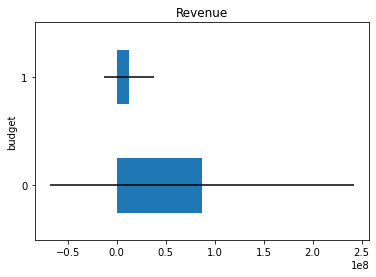

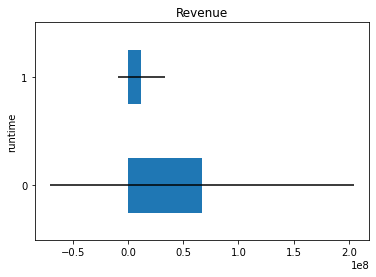

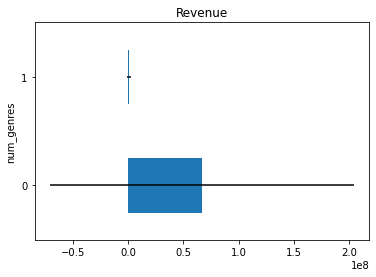

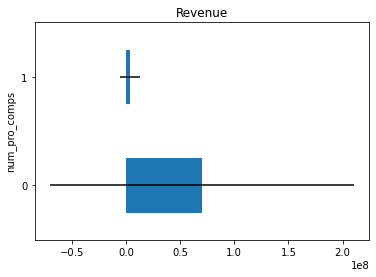

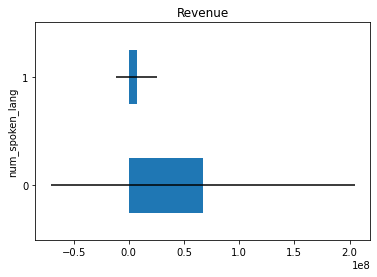

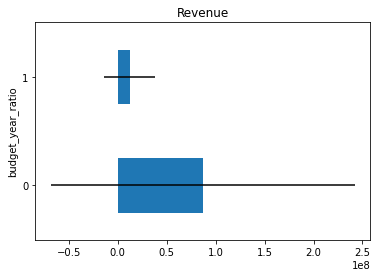

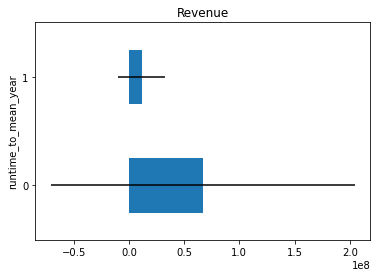

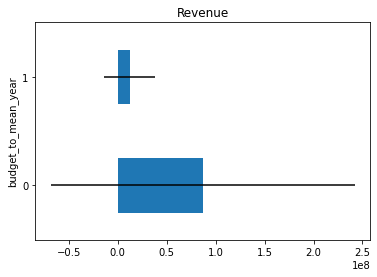

In [30]:
# run the funtion on each variable with missing data

for var in vars_with_na:
    analyze_na_value(data, var)

We can see that the average revenue in films where the information is missing, differs from the average revenue in films where information exists. This suggests that data being missing could be a good predictor of revenue. 

## Numerical variables

### Simple EDA

We have 8 numerical variables. Let's explore numerical variables

In [31]:
print('Number of numerical variables: ', len(num_vars))

data[num_vars].head()

Number of numerical variables:  8


,budget,popularity,runtime,num_cast,budget_year_ratio,runtime_to_mean_year,popularity_to_mean_year,budget_to_mean_year
0,14000000.0,6.575393,93.0,24,3.448085,0.830821,0.642915,0.324913
1,40000000.0,8.248895,113.0,20,9.960120,1.075080,0.984041,1.014210
2,3300000.0,64.299990,105.0,51,0.813570,0.979870,6.073148,0.091796
3,1200000.0,3.174936,122.0,7,0.296432,1.133127,0.387724,0.030480
4,NaN,1.148070,118.0,4,NaN,1.107001,0.145631,NaN


In [32]:
def num_plots(df, var):
    """Function to create histogram, and boxplot for numerical variables"""
    plt.figure(figsize=(8, 3))

    plt.subplot(121)
    df[var].hist(bins=50)
    plt.title('Histogram')
    plt.xlabel(var)
    
   # plt.subplot(1, 3, 2)
   # stats.probplot(df[var], plot=plt)
    
    plt.subplot(122)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')
    
    plt.show()

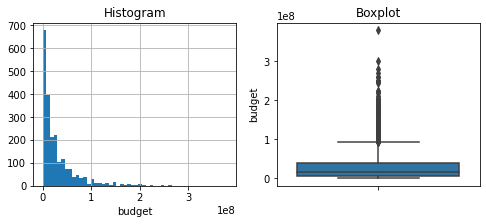

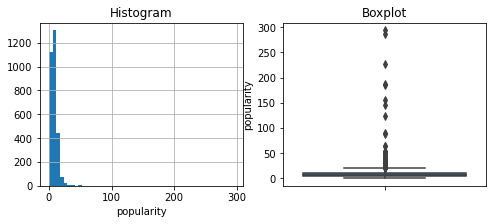

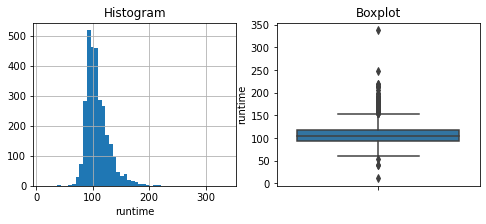

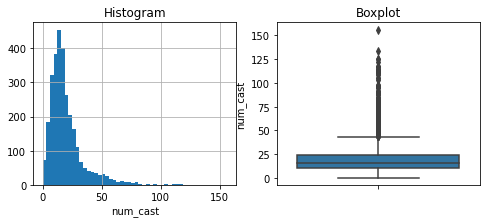

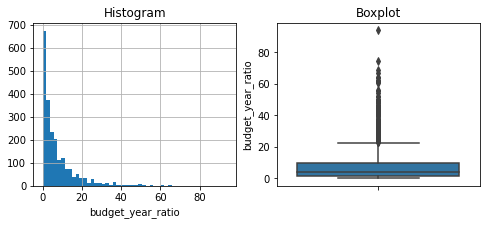

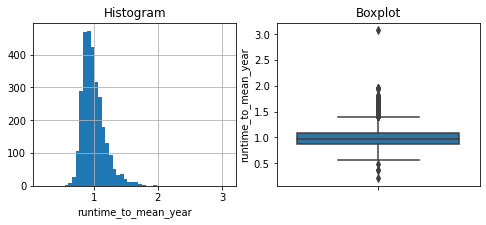

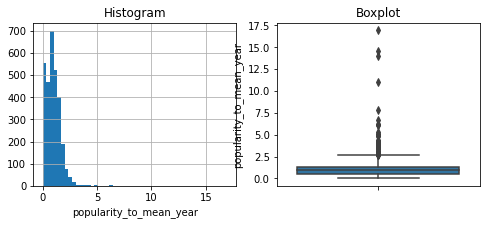

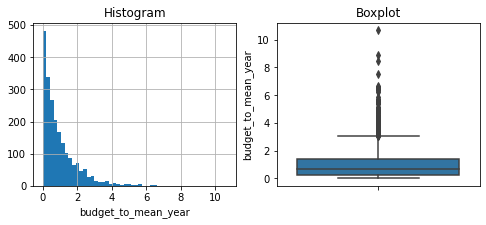

In [33]:
for var in num_vars:
    num_plots(data, var)

- `budget` shows skewed distribution towards the right.
- `popularity` indicates right-skewed distribution.
- `runtime` has Gaussian distribution.
- `num_cast` shows right-skewed distribution.
- `budget_year_ratio` shows right-skewed distribution.
- `runtime_to_mean_year` has Gaussian distribution.
- `popularity_to_mean_year` has right-skewed distribution.
- `budget_to_mean_year` has right-skewed distribution. 

Except for `runtime` and `runtime_to_mean_year`, other variables show right-skewed distribution. 

### Continous variables Transformation

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically. 

I would like to figure out which transformation method is best for the variables. 

In [34]:
# create skewed variable list
skewed = ['budget', 'popularity', 'num_cast',
         'budget_year_ratio', 'popularity_to_mean_year', 'budget_to_mean_year']

In [35]:
# capture the remaining continuous variables
cont_vars = ['runtime', 'runtime_to_mean_year']

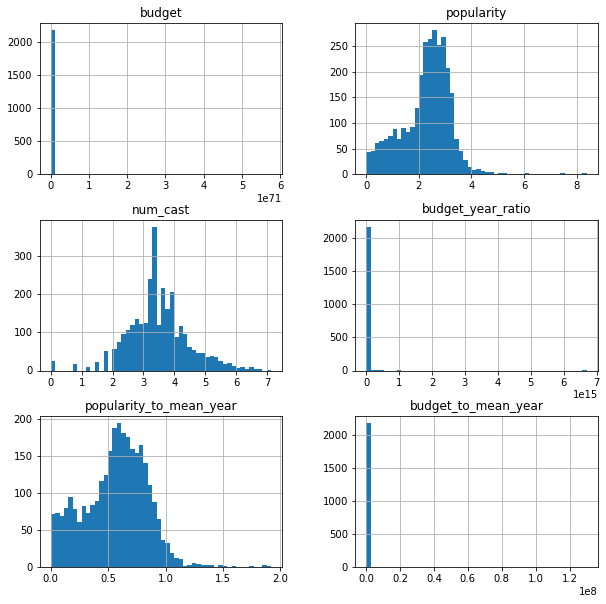

In [36]:
# temporary copy of the data
tmp = data.copy()

for var in skewed:
    
    # transform the variable - yeo-johnson
    tmp[var], param = stats.yeojohnson(data[var])
    
# plot the histogram of the transformed variables
tmp[skewed].hist(bins=50, figsize=(10, 10))
plt.show()

`popularity`, `num_cast`, and `popularity_to_mean_year`'s distributions improved with yeo-johnson transformation.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance. 

Here, we will do s quick visual exploration here:

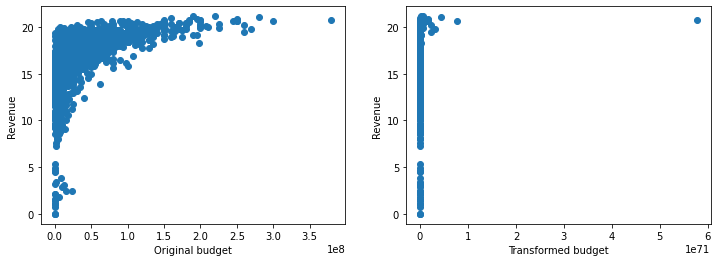

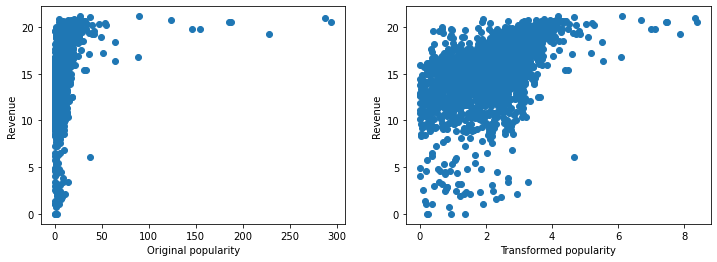

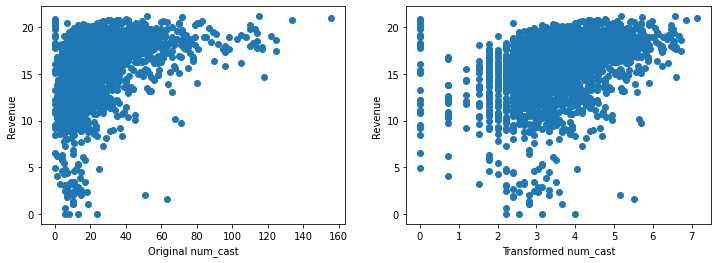

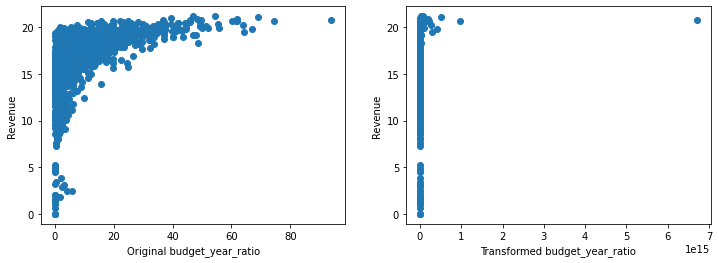

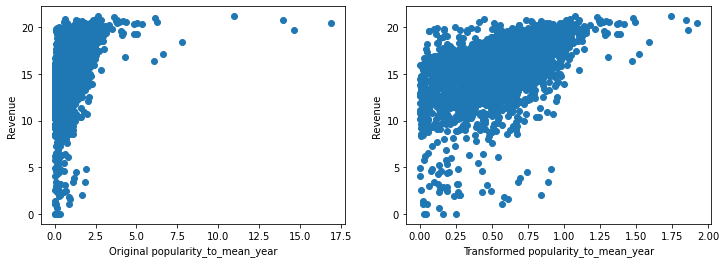

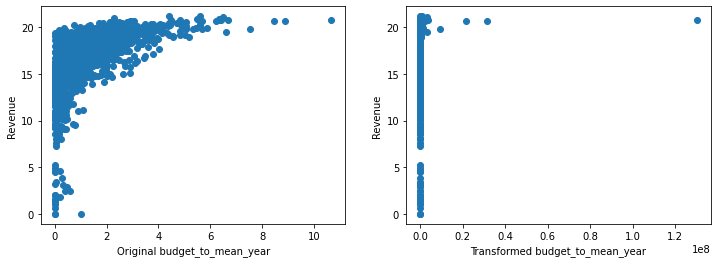

In [37]:
for var in skewed:
    
    plt.figure(figsize=(12, 4))
    
    # plot the original variable vs revenue
    plt.subplot(121)
    plt.scatter(data[var], np.log(data['revenue']))
    plt.ylabel('Revenue')
    plt.xlabel('Original ' + var)
    
    # plot transformed variable vs sale price
    plt.subplot(122)
    plt.scatter(tmp[var], np.log(tmp['revenue']))
    plt.ylabel('Revenue')
    plt.xlabel('Transformed ' + var)
    
    plt.show()

The yeo-johnson transformation seems not to improve the relationship between revenue and variables. 

Let's try a different transformation. 

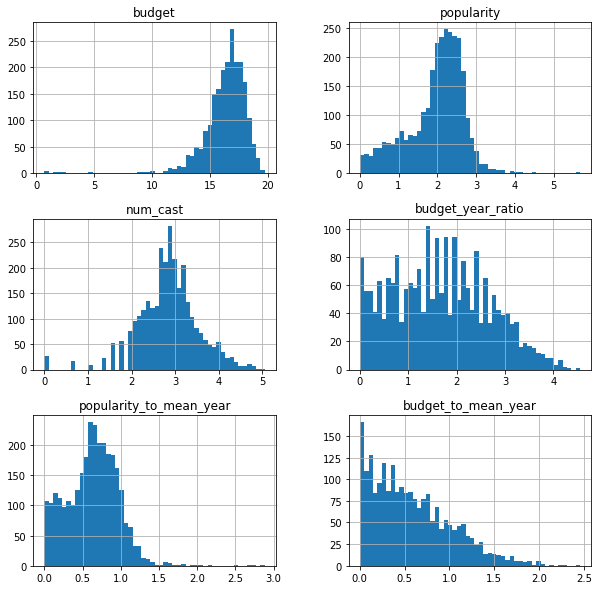

In [38]:
# temporary copy of the data
tmp = data.copy()

for var in skewed:
    
    # transform the variable - yeo-johnson
    #tmp[var], param = stats.yeojohnson(data[var])
    tmp[var] = np.log1p(tmp[var])
    
# plot the histogram of the transformed variables
tmp[skewed].hist(bins=50, figsize=(10, 10))
plt.show()

All skewed variables improved distribution with log transformation.



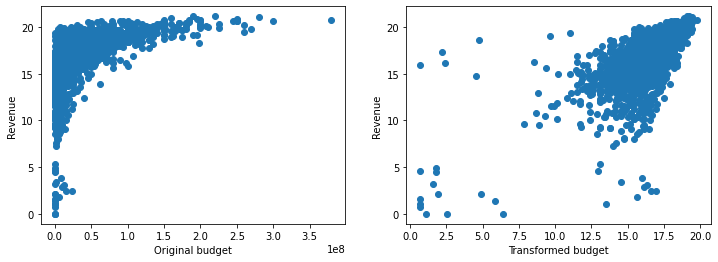

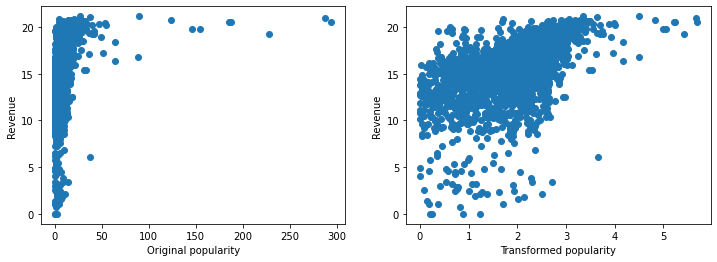

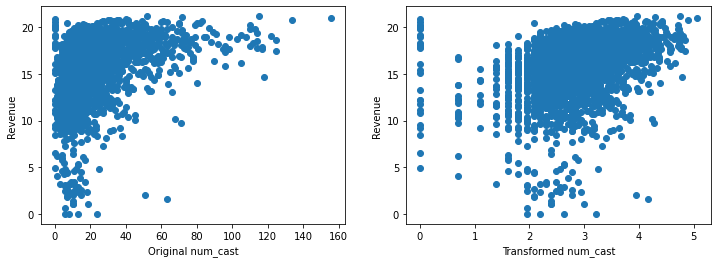

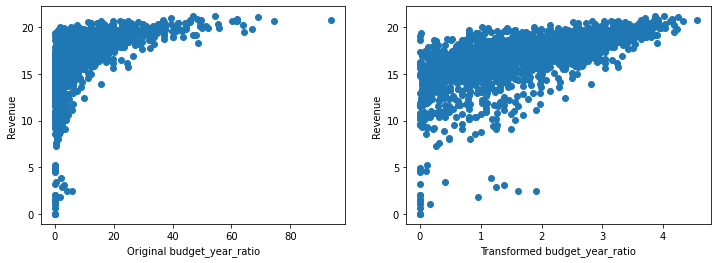

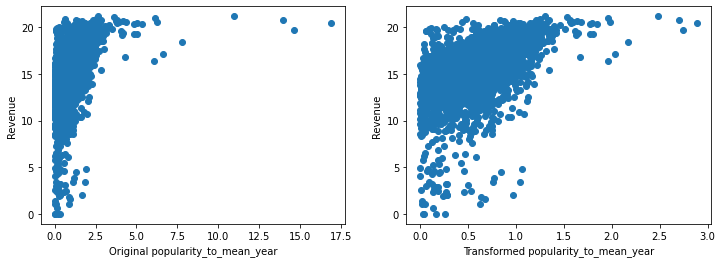

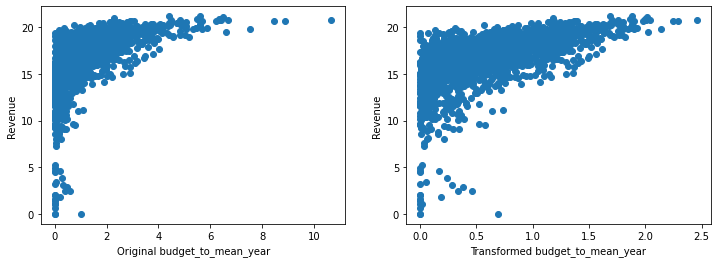

In [39]:
for var in skewed:
    
    plt.figure(figsize=(12, 4))
    
    # plot the original variable vs revenue
    plt.subplot(121)
    plt.scatter(data[var], np.log(data['revenue']))
    plt.ylabel('Revenue')
    plt.xlabel('Original ' + var)
    
    # plot transformed variable vs sale price
    plt.subplot(122)
    plt.scatter(tmp[var], np.log(tmp['revenue']))
    plt.ylabel('Revenue')
    plt.xlabel('Transformed ' + var)
    
    plt.show()

Only budget and popularity were improved with log transformation. 

In [40]:
# create a list of log transformation for cont_vars
log_trans = ['budget', 'popularity']

## Binary variables

We have 3 binary variables: `is_collection`, `is_homepage`, and `is_English`

Let's see how predictive they are:

In [41]:
binary_vars = ['is_collection', 'is_homepage', 'is_English']

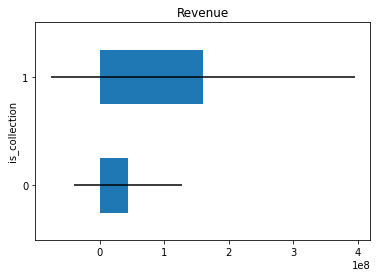

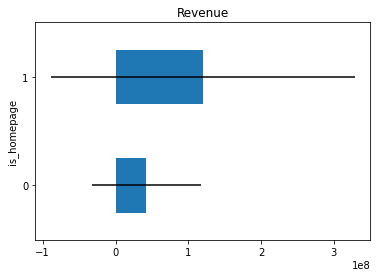

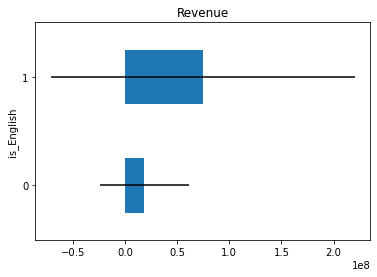

In [42]:
for var in binary_vars:
    tmp = data.copy()
    
    # determine mean revenue in the mapped values
    tmp = tmp.groupby(var)['revenue'].agg(['mean', 'std'])
    
    # plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False,
            xerr='std', title='Revenue')
    
    plt.show()

There seem to be a different in revenue in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive. 

## Categorical variables

We have 6 categorical variables including datetime variables.

In [43]:
data[cat_vars].head()

,num_genres,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_crew
0,1,3,1,1,<5,medium
1,4,1,1,1,<5,small
2,1,3,1,1,<15,medium
3,2,NaN,1,2,<10,small
4,2,NaN,1,1,<5,small


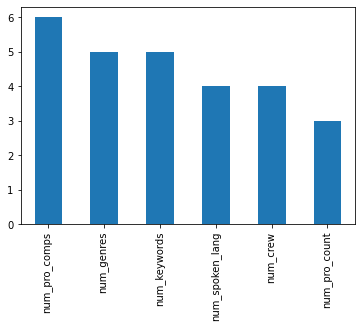

In [46]:
# let's see the number of cardinality in each categorical variable
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(6, 4));

All the categorical variables show low cardinality, this means that they have only few different labels. This is good as we won't need to tackle cardinality.

Let's create plots that explore the relationship between the categories of the different variables and the revenue. 

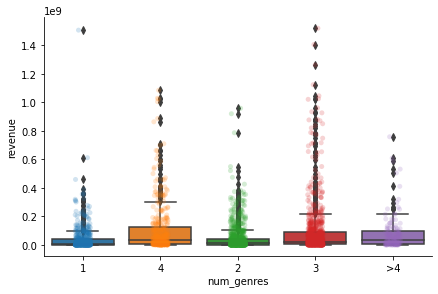

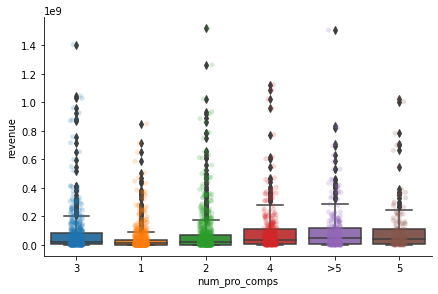

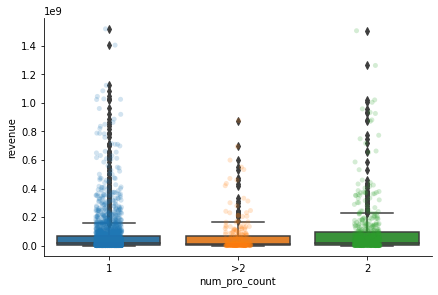

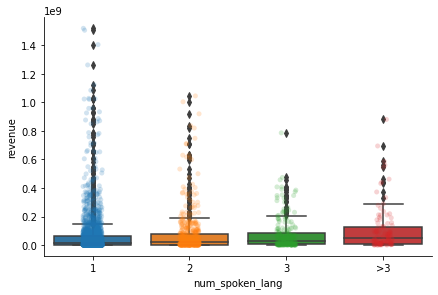

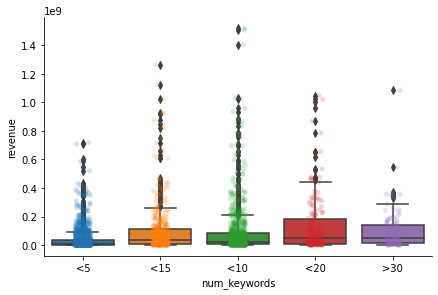

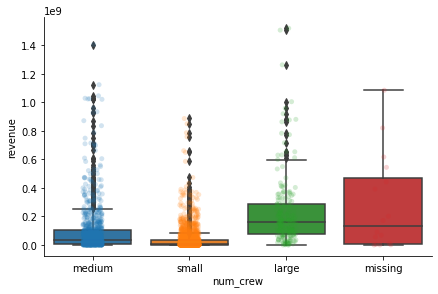

In [48]:
for var in cat_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='revenue', data=data, kind='box', height=4, aspect=1.5)
    
    # add data points to boxkplot with stripplot
    sns.stripplot(x=var, y='revenue', data=data, jitter=0.1, alpha=0.2)
    plt.show()

## Correlations between numerical variables and target

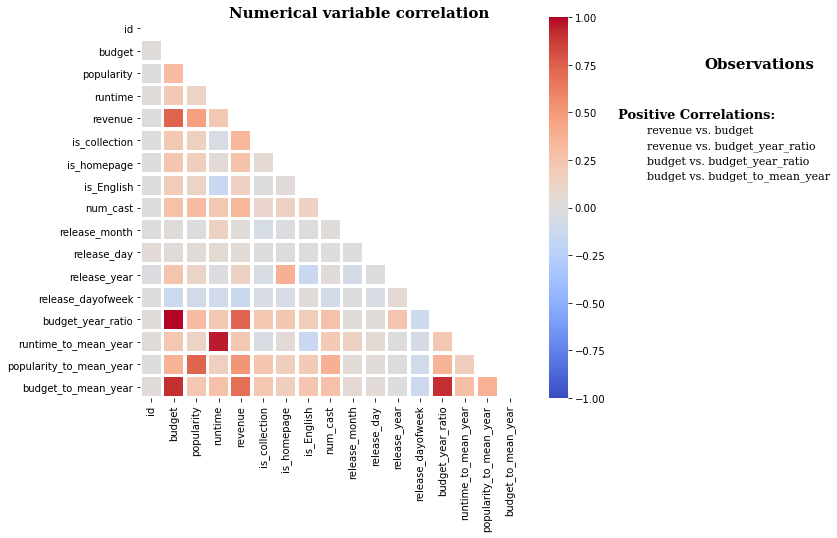

In [53]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))

fig.text(.34, .88, 'Numerical variable correlation', fontfamily='serif', fontweight='bold', fontsize=15)
fig.text(1.00,.78, 'Observations', fontfamily='serif', fontweight='bold', fontsize=15)
fig.text(.88, .68, 'Positive Correlations:', fontfamily='serif', fontweight='bold', fontsize=13)
fig.text(.92, .65, 'revenue vs. budget', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .62, 'revenue vs. budget_year_ratio', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .59, 'budget vs. budget_year_ratio', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .56, 'budget vs. budget_to_mean_year', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .53, 'runtime vs. runtime_to_mean_year', fontfamily='serif', fontweight='light', fontsize=11)



pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=2.5)
plt.show()

`revenue`, the target variable, is highly correlated with budget related variables including `budget`, `budget_year_ratio`, `budget_to_mean_year`.  Also, `budget` is highly correlated with `budget_year_ratio` and `budget_to_mean_year` which make sense because those variables were created with `budget` and `year`. Furthermore, `runtime` is highly correlated with `runtime_to_mean_year`. Therefore, when performing feature selection, we need to decide to remove highly correlated variables. 

## Conclusion

In [51]:
# save engineered data
data.to_csv(path/'engineered_train.csv', index=False)
data_test.to_csv(path/'engineered_test.csv', index=False)

We explored the variables in dataset. Also, we create 4 new features. 

Next, I will investigate the suitable missing value imputation methods, and feature scaling methods before building a model.  